In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jokes = pd.read_csv('jester-data-1.csv')
# jokes_values = pd.read_csv('jokeid_to_joke.csv')
#jokes = jokes.reset_index()
print('Number of Ratings:'+str(len(jokes)))
#jokes = jokes.T
print(jokes.head(10))
# print(jokes_values.head(10)[0:2][:])


Number of Ratings:24983
   Joke1  Joke2  Joke3  Joke4  Joke5  ...  Joke96  Joke97  Joke98  Joke99  Joke100
0  -7.82   8.79  -9.66  -8.16  -7.52  ...   99.00   -5.63   99.00   99.00    99.00
1   4.08  -0.29   6.36   4.37  -2.38  ...   -2.14    3.06    0.34   -4.32     1.07
2  99.00  99.00  99.00  99.00   9.03  ...   99.00   99.00   99.00   99.00    99.00
3  99.00   8.35  99.00  99.00   1.80  ...   99.00   99.00   99.00   99.00    99.00
4   8.50   4.61  -4.17  -5.39   1.36  ...    1.55    3.11    6.55    1.80     1.60
5  -6.17  -3.54   0.44  -8.50  -7.09  ...   -3.35    0.05   -9.08   -5.05    -3.45
6  99.00  99.00  99.00  99.00   8.59  ...    2.33   99.00   99.00   99.00    99.00
7   6.84   3.16   9.17  -6.21  -8.16  ...   -3.35    2.14   -0.05    1.31     0.00
8  -3.79  -3.54  -9.42  -6.89  -8.74  ...   -0.29   -0.29   -0.29   -3.40    -4.95
9   3.01   5.15   5.15   3.01   6.41  ...   99.00   99.00   99.00   99.00    99.00

[10 rows x 100 columns]


In [ ]:
# find the number of values to remove
# handle 99 as removed data
#25 %  removing


from random import randrange
number_to_remove = 625000 

sparse_jokes = np.array(jokes, copy=True)
initial_count_99 = np.sum(np.count_nonzero(jokes == 99, axis=0))
print("Initial count", initial_count_99)

np.random.seed(32) # TODO : remove this
m = np.random.randint(low=0, high=len(jokes), size=(len(jokes),))
p = np.random.randint(low=0, high=jokes.shape[1], size=(jokes.shape[1],))
list_indices=[]

count = 0 
for row_index in m:
  for column_index in p :
    if sparse_jokes[row_index][column_index] != 99:

      sparse_jokes[row_index][column_index] = 99
      count +=1
      list_indices.append((row_index,column_index))
    if count == number_to_remove:
      break
  else:
      continue  # only executed if the inner loop did NOT break
  break

#print(list_indices)

#List_Of_Indices=list(map(lambda a: str(a)+'\n', list_indices))

#with open('/content/drive/MyDrive/Indices_Recommendation.csv','w') as f:
  #f.writelines(List_Of_Indices)

final_count_99 = np.sum(np.count_nonzero(sparse_jokes == 99, axis=0))
print("Final count", final_count_99)

Initial count 687845
Final count 1312845


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Computing Sum and Count for L1 and L2 Losses
def Compute_Sum_and_Count_for_Loss(Mat):
  '''
  sum_l1 = 0
  sum_l2 = 0
  for (row_index,column_index) in list_indices:
        sum_l1 = sum_l1 + abs(jokes.loc[row_index][column_index] - jokes_mean_imputed[row_index][column_index])
        sum_l2 = sum_l2 + (jokes.loc[row_index][column_index] - jokes_mean_imputed[row_index][column_index])**2
  '''
  temp_jokes = np.array(jokes, copy=True)
  temp_jokes[temp_jokes==99]=np.nan
  print(np.count_nonzero(np.isnan(temp_jokes)))
  sum_l1=np.nansum(abs(temp_jokes-Mat))
  sum_l2=(np.nansum(abs(temp_jokes-Mat)**2))

  return sum_l1,sum_l2

In [ ]:
# Computing and displaying for L1 and L2 Losses
def Compute_and_Print_Loss(sum_l1,sum_l2,count):
  l1_loss = sum_l1/count
  l2_loss = sum_l2/count
  print("total sum_l1:", sum_l1)
  print("total sum_l2:", sum_l2)
  print("total count:", count)
  print("L1:", l1_loss)
  print("L2:",l2_loss)
  return l1_loss,l2_loss

In [ ]:
#### 1. replace with mean BASELINE 1 #####
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

mean_simple_imputer = SimpleImputer(missing_values=99, strategy='mean')
jokes_mean_imputed = mean_simple_imputer.fit_transform(sparse_jokes)

no_of_99_jokes = np.sum(np.count_nonzero(jokes_mean_imputed == 99, axis=0))
#print("Not imputed jokes count", no_of_99_jokes)

In [ ]:
# Computing and printing losses for BASELINE
count=625000
sum_l1,sum_l2=Compute_Sum_and_Count_for_Loss(jokes_mean_imputed)
l1_loss,l2_loss=Compute_and_Print_Loss(sum_l1,sum_l2,count)

687845
total sum_l1: 2595258.35752431
total sum_l2: 15787582.811868133
total count: 625000
L1: 4.152413372038896
L2: 25.260132498989012


In [ ]:
##### Prepare dense dataset  ######
 
present_99_sparse = np.sum(np.count_nonzero(sparse_jokes == 99, axis=0))
print(present_99_sparse)

sparse_jokes_clean = np.copy(sparse_jokes)
rows_with_99 = np.count_nonzero(sparse_jokes == 99, axis=1)
rows_with_99_index= np.where(rows_with_99 != 0)


dense_matrix = np.delete(sparse_jokes_clean, rows_with_99_index, axis=0 )

present_99_dense = np.sum(np.count_nonzero(dense_matrix == 99, axis=0))
print("Dense matrix 99 count", present_99_dense)


1312845
Dense matrix 99 count 0


In [ ]:
# from google.colab import drive
# drive.mount("mnt")
# %cd "mnt/My Drive/CIS-520Project"
# !pip install import-ipynb
# import import_ipynb


In [ ]:
# ######## Similarity Metric : Difference ###########
def KNN_manhattan(dense_matrix,joke_index_to_predict=1):
    dense_jokes_difference = np.copy(dense_matrix)

    primary_joke = dense_jokes_difference[:,joke_index_to_predict].reshape(dense_jokes_difference.shape[0], -1)
    secondary_jokes = dense_jokes_difference

    difference_matrix = np.abs(secondary_jokes - primary_joke)

    l2norm = np.linalg.norm(difference_matrix, ord=2, axis=0, keepdims=False)

    return np.argsort(l2norm), np.sort(l2norm)




In [ ]:
######## Similarity Metric : Cosine Similarity ###########
from sklearn.metrics.pairwise import cosine_similarity
import scipy

def KNN_cosine(dense_matrix,joke_index_to_predict_cosine=1):

    dense_jokes_cosine = np.copy(dense_matrix)
    #joke_index_to_predict_cosine = 1

    primary_joke_cosine = dense_jokes_cosine[:,joke_index_to_predict_cosine].reshape(dense_jokes_cosine.shape[0], -1)
    secondary_jokes = dense_jokes_cosine
    #print(primary_joke.shape, secondary_jokes.shape)

    similarities = []
    for i in range(secondary_jokes.shape[1]):
      cosine_similarity = 1 - scipy.spatial.distance.cosine(primary_joke_cosine, secondary_jokes[:,i])
      similarities.append(cosine_similarity)

    similarities = np.array(similarities)
    # print(similarities)
    
    cosine_similarity_value = np.sort(similarities)[::-1]
    # print(cosine_similarity_value)

    # print(similarities.shape)
    similarities = np.argsort(similarities)[::-1]
    # print(similarities[1:k+1])
    return similarities, cosine_similarity_value

In [ ]:
#####KNN Eucledian Similarity ######
def Compute_Knn_Manhatten(k=10):
  #Dictionary for storing similar jokes (for each joke) from dense matrix
  jokes_sim_manhattan = {}
  for r in range (0,100):
      jokes_sim_manhattan[r],b=KNN_manhattan(dense_matrix,r)

  #Number of users
  m=sparse_jokes.shape[0]
  #Number of jokes
  p=sparse_jokes.shape[1]
  #print(m)
  #print(p)

  # Number of nearest neighbors
  #k=10

  #sparse_matrix_knn_Eucle - Matrix to be imputed using KNN Eucledian Similarity
  sparse_matrix_knn_manhattan = np.copy(sparse_jokes)

  for user in range(m):
    for joke in range(p):
      if sparse_matrix_knn_manhattan[user][joke]==99: #Checking if value is 99
        similar_jokes=jokes_sim_manhattan[joke] # Finding similar jokes for given joke
        count=0 # count for checking if we reached no. of nearest neighbors 
        sum=0
        joke_num=1 # count for checking if we reached all jokes (max value can be 99)

        # Check how many similar jokes the user has rated
        user_data = np.copy(sparse_matrix_knn_manhattan[user])
        user_data_sorted = user_data[similar_jokes]

        
        user_non_99 = user_data_sorted[user_data_sorted != 99]
        user_non_99_k = user_non_99[:k]
        if (user_non_99_k.shape[0]):
          # user rated similar jokes found
          sparse_matrix_knn_manhattan[user][joke] = np.mean(user_non_99_k)
        else:
          # No user rated similar jokes found
          sparse_matrix_knn_manhattan[user][joke]=jokes_mean_imputed[user][joke]


        # while(count!=k and joke_num!=99): #Either we reached our nearest neighbors or we finished iterating through all possible jokes
        #       if(sparse_matrix_knn_manhattan[user][similar_jokes[joke_num]]!=99):
        #         sum=sum+sparse_matrix_knn_manhattan[user][similar_jokes[joke_num]]
        #         count=count+1
        #       joke_num+=1
        # if(count!=0): #Checking divide by zero error
        #     sparse_matrix_knn_manhattan[user][joke]=sum/count
        # else:
        #     sparse_matrix_knn_manhattan[user][joke]=jokes_mean_imputed[user][joke] #If count=0, replace by mean rating of all users
  return sparse_matrix_knn_manhattan

In [ ]:
k=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,30,35]
count=625000
#k=[5,10,60]
l1_losses_KNN_Manhatten=[]
l2_losses_KNN_Manhatten=[]

for i in k:
  print("k=",i)
  sparse_matrix_knn_manhattan=Compute_Knn_Manhatten(i)
  sum_l1,sum_l2=Compute_Sum_and_Count_for_Loss(sparse_matrix_knn_manhattan)
  l1_loss,l2_loss=Compute_and_Print_Loss(sum_l1,sum_l2,count)
  l1_losses_KNN_Manhatten.append(l1_loss)
  l2_losses_KNN_Manhatten.append(l2_loss)
  print("**********")

k= 3
687845
total sum_l1: 2123243.465321491
total sum_l2: 12943125.328766117
total count: 625000
L1: 3.3971895445143856
L2: 20.709000526025786
**********
k= 4
687845
total sum_l1: 2083396.1234567375
total sum_l2: 12230316.878324164
total count: 625000
L1: 3.33343379753078
L2: 19.56850700531866
**********
k= 5
687845
total sum_l1: 2069537.2983973704
total sum_l2: 11925688.966923214
total count: 625000
L1: 3.3112596774357925
L2: 19.08110234707714
**********
k= 6
687845
total sum_l1: 2060331.5097206782
total sum_l2: 11703972.875666728
total count: 625000
L1: 3.296530415553085
L2: 18.726356601066765
**********
k= 7
687845
total sum_l1: 2061410.8831954936
total sum_l2: 11645503.987509346
total count: 625000
L1: 3.2982574131127897
L2: 18.63280638001495
**********
k= 8
687845
total sum_l1: 2060673.5712658465
total sum_l2: 11555898.569520164
total count: 625000
L1: 3.297077714025354
L2: 18.489437711232263
**********
k= 9
687845
total sum_l1: 2062297.9707702715
total sum_l2: 11526188.064788776


23


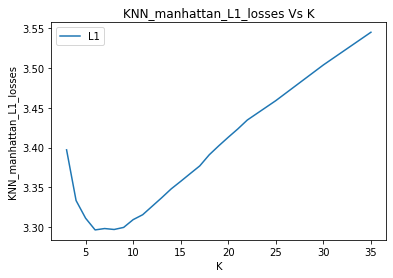

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_manhattan L1 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l1_losses_KNN_Manhatten, label = "L1")
plt.legend()
plt.title('KNN_manhattan_L1_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_manhattan_L1_losses')
plt.show()

23


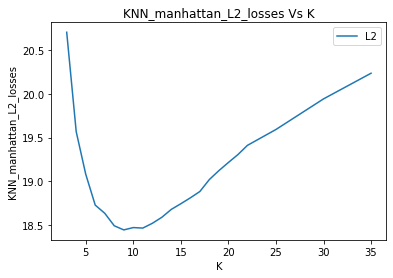

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_manhattan L2 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l2_losses_KNN_Manhatten, label = "L2")
plt.legend()
plt.title('KNN_manhattan_L2_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_manhattan_L2_losses')
plt.show()

In [ ]:
##### Filling missing values using KNN Cosine Similarity ######
def Compute_Knn_Cosine(k=10):

  Jokes_sim_cosine = {}
  Jokes_sim_cosine_values = {}
  for r in range (0,100):
      Jokes_sim_cosine[r], Jokes_sim_cosine_values[r]=KNN_cosine(dense_matrix,r)

  m=sparse_jokes.shape[0]
  p=sparse_jokes.shape[1]

  #k=10

  sparse_matrix_knn_cosine = np.copy(sparse_jokes)

  for user in range(m):
    for joke in range(p):
      if sparse_matrix_knn_cosine[user][joke]==99:
        similar_jokes=Jokes_sim_cosine[joke]
        count=0
        sum=0
        joke_num=1

        # Check how many similar jokes the user has rated
        user_data = np.copy(sparse_matrix_knn_cosine[user])
        user_data_sorted = user_data[similar_jokes]

        user_non_99 = user_data_sorted[user_data_sorted != 99]
        user_non_99_k = user_non_99[:k]
        if (user_non_99_k.shape[0]):
          # user rated similar jokes found
          sparse_matrix_knn_cosine[user][joke] = np.mean(user_non_99_k)
        else:
          # No user rated similar jokes found
          sparse_matrix_knn_cosine[user][joke]=jokes_mean_imputed[user][joke]
        # while(count!=k and joke_num!=99):
        #       if(sparse_matrix_knn_cosine[user][similar_jokes[joke_num]]!=99):
        #         sum=sum+sparse_matrix_knn_cosine[user][similar_jokes[joke_num]]
        #         count=count+1
        #       joke_num+=1
        # if(count!=0):
        #     sparse_matrix_knn_cosine[user][joke]=sum/count
        # else:
        #     sparse_matrix_knn_cosine[user][joke]=jokes_mean_imputed[user][joke]
  return sparse_matrix_knn_cosine

In [ ]:
# Performs KNN_Cosine similarity for imputing ratings and loss for different K values 
k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,30,35]
count=625000
#k=[5,10,60]
l1_losses_KNN_Cosine=[]
l2_losses_KNN_Cosine=[]

for i in k:
  print("k=",i)
  sparse_matrix_knn_cosine=Compute_Knn_Cosine(i)
  sum_l1,sum_l2=Compute_Sum_and_Count_for_Loss(sparse_matrix_knn_cosine)
  l1_loss,l2_loss=Compute_and_Print_Loss(sum_l1,sum_l2,count)
  l1_losses_KNN_Cosine.append(l1_loss)
  l2_losses_KNN_Cosine.append(l2_loss)
  print("**********")

k= 2
687845
total sum_l1: 2204099.3537692274
total sum_l2: 14410310.495167524
total count: 625000
L1: 3.526558966030764
L2: 23.05649679226804
**********
k= 3
687845
total sum_l1: 2117134.6635053623
total sum_l2: 12967314.616420168
total count: 625000
L1: 3.3874154616085796
L2: 20.74770338627227
**********
k= 4
687845
total sum_l1: 2083479.3638726214
total sum_l2: 12317155.266595917
total count: 625000
L1: 3.3335669821961944
L2: 19.707448426553466
**********
k= 5
687845
total sum_l1: 2070517.4208859203
total sum_l2: 12013753.063598832
total count: 625000
L1: 3.3128278734174725
L2: 19.222004901758133
**********
k= 6
687845
total sum_l1: 2066787.4295956492
total sum_l2: 11879451.386758892
total count: 625000
L1: 3.306859887353039
L2: 19.007122218814228
**********
k= 7
687845
total sum_l1: 2065998.748336065
total sum_l2: 11784963.62758857
total count: 625000
L1: 3.305597997337704
L2: 18.85594180414171
**********
k= 8
687845
total sum_l1: 2064832.2397952052
total sum_l2: 11705995.101870771


24


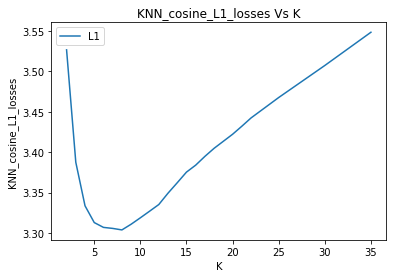

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_cosine L1 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l1_losses_KNN_Cosine, label = "L1")
plt.legend()
plt.title('KNN_cosine_L1_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_cosine_L1_losses')
plt.show()

24


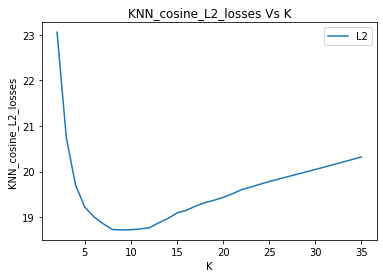

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_cosine L1 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l2_losses_KNN_Cosine, label = "L2")
plt.legend()
plt.title('KNN_cosine_L2_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_cosine_L2_losses')
plt.show()

In [ ]:
from scipy import stats
def pearson_similarity(dense_matrix,joke_index_to_predict=1):
    dense_jokes_pearson = np.copy(dense_matrix)

  #scipy.stats.pearsonr(dense_matrix,joke_index_to_predict=1):

    primary_joke_pearson = dense_jokes_pearson[:,joke_index_to_predict].reshape(dense_jokes_pearson.shape[0], -1)
    secondary_jokes = dense_jokes_pearson
    #print(primary_joke.shape, secondary_jokes.shape)

    similarities = []
    for i in range(secondary_jokes.shape[1]):
      pearson_similarity, _ = stats.pearsonr(primary_joke_pearson.ravel(), secondary_jokes[:,i].ravel())
      similarities.append(pearson_similarity)

    similarities = np.array(similarities)
    # print(similarities)
    
    pearson_similarity_value = np.sort(similarities)[::-1]
    # print(cosine_similarity_value)

    # print(similarities.shape)
    similarities = np.argsort(similarities)[::-1]
    # print(similarities[1:k+1])
    return similarities, pearson_similarity_value

# print(pearson_similarity(dense_matrix, joke_index_to_predict= 1) )


In [ ]:
##### Filling missing values using Pearson Similarity ######
def Compute_Knn_Pearson(k=10):

  Jokes_sim_pearson = {}
  Jokes_sim_pearson_values = {}
  for r in range (0,100):
      Jokes_sim_pearson[r], Jokes_sim_pearson_values[r]=pearson_similarity(dense_matrix,r)

  m=sparse_jokes.shape[0]
  p=sparse_jokes.shape[1]

  #k=10

  sparse_matrix_knn_pearson = np.copy(sparse_jokes)

  for user in range(m):
    for joke in range(p):
      if sparse_matrix_knn_pearson[user][joke]==99:
        similar_jokes=Jokes_sim_pearson[joke]
        count=0
        sum=0
        joke_num=1

        # Check how many similar jokes the user has rated
        user_data = np.copy(sparse_matrix_knn_pearson[user])
        user_data_sorted = user_data[similar_jokes]

        user_non_99 = user_data_sorted[user_data_sorted != 99]
        user_non_99_k = user_non_99[:k]
        if (user_non_99_k.shape[0]):
          # user rated similar jokes found
          sparse_matrix_knn_pearson[user][joke] = np.mean(user_non_99_k)
        else:
          # No user rated similar jokes found
          sparse_matrix_knn_pearson[user][joke]=jokes_mean_imputed[user][joke]
  return sparse_matrix_knn_pearson

In [ ]:
# Performs KNN_pearson similarity for imputing ratings and loss for different K values 
k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,30,35]
count=625000
#k=[5,10,60]
l1_losses_KNN_pearson=[]
l2_losses_KNN_pearson=[]

for i in k:
  print("k=",i)
  sparse_matrix_knn_pearson=Compute_Knn_Pearson(i)
  sum_l1,sum_l2=Compute_Sum_and_Count_for_Loss(sparse_matrix_knn_pearson)
  l1_loss,l2_loss=Compute_and_Print_Loss(sum_l1,sum_l2,count)
  l1_losses_KNN_pearson.append(l1_loss)
  l2_losses_KNN_pearson.append(l2_loss)
  print("**********")

k= 2
687845
total sum_l1: 2233229.2596083162
total sum_l2: 14706832.960359665
total count: 625000
L1: 3.573166815373306
L2: 23.530932736575462
**********
k= 3
687845
total sum_l1: 2167455.910066342
total sum_l2: 13363733.945221275
total count: 625000
L1: 3.4679294561061473
L2: 21.38197431235404
**********
k= 4
687845
total sum_l1: 2122635.2132539484
total sum_l2: 12586518.116866907
total count: 625000
L1: 3.3962163412063173
L2: 20.13842898698705
**********
k= 5
687845
total sum_l1: 2105845.9790275013
total sum_l2: 12253136.542195085
total count: 625000
L1: 3.369353566444002
L2: 19.605018467512135
**********
k= 6
687845
total sum_l1: 2096561.499041055
total sum_l2: 12031479.231719507
total count: 625000
L1: 3.354498398465688
L2: 19.25036677075121
**********
k= 7
687845
total sum_l1: 2090299.163498612
total sum_l2: 11853140.73478449
total count: 625000
L1: 3.344478661597779
L2: 18.96502517565518
**********
k= 8
687845
total sum_l1: 2089434.527266954
total sum_l2: 11774505.617947318
total

24


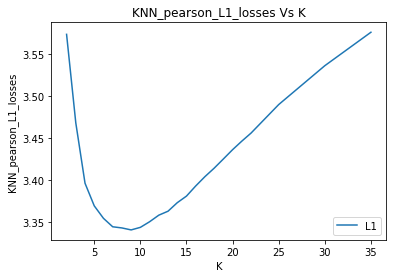

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_cosine L1 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l1_losses_KNN_pearson, label = "L1")
plt.legend()
plt.title('KNN_pearson_L1_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_pearson_L1_losses')
plt.show()

24


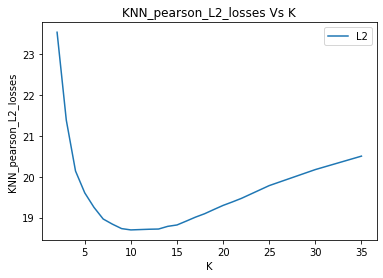

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_cosine L1 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l2_losses_KNN_pearson, label = "L2")
plt.legend()
plt.title('KNN_pearson_L2_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_pearson_L2_losses')
plt.show()